# Trying Prophet for time series forecasting
Material obtained from [here](https://www.youtube.com/watch?v=KvLG1uTC-KU)   
Nov 30th 2021

In [1]:
import os
import sys
import pandas as pd
from prophet import Prophet
print(sys.executable)

/home/razielar/miniconda3/envs/ml/bin/python


## Read data

In [14]:
df= pd.read_csv("dataset/dataset.csv")
print(df.shape)
df.head()

(1080, 4)


,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [15]:
print(df["Product"].unique())
print(df["Store"].unique())

[2667437]
['QLD_CW_ST0203']


In [16]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [17]:
df["Year"]= df["Time Date"].apply(lambda x: str(x)[-4:])
df["Month"]= df["Time Date"].apply(lambda x: str(x)[-6:-4])
df["Day"]= df["Time Date"].apply(lambda x: str(x)[:-6])
df["ds"]= pd.DatetimeIndex(df["Year"] + "-" + df["Month"] + "-" + df["Day"])

In [18]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [19]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [20]:
df.drop(["Time Date", "Product", "Store", "Year", "Month", "Day"], axis= 1, inplace= True)
df.columns = ['y', 'ds']

## Train model

In [24]:
# interval_width= is confiance interval
# daily_seasonality= True, is bc we have data in days
m= Prophet(interval_width= 0.95, daily_seasonality= True)
model= m.fit(df)

## Predictions

In [34]:
# periods= int of number of forecast forward
# D= days
future= m.make_future_dataframe(periods= 100, freq= "D")
forecast= m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.922623,764.611676,3921.616668,3041.922623,3041.922623,-640.836284,-640.836284,-640.836284,469.418737,...,16.621566,16.621566,16.621566,-1126.876587,-1126.876587,-1126.876587,0.0,0.0,0.0,2401.086339
1,2018-01-02,3042.671721,755.179747,3797.352482,3042.671721,3042.671721,-650.986961,-650.986961,-650.986961,469.418737,...,-11.278224,-11.278224,-11.278224,-1109.127474,-1109.127474,-1109.127474,0.0,0.0,0.0,2391.684761
2,2018-01-03,3043.420820,749.988823,4103.320827,3043.420820,3043.420820,-625.176014,-625.176014,-625.176014,469.418737,...,-4.403204,-4.403204,-4.403204,-1090.191547,-1090.191547,-1090.191547,0.0,0.0,0.0,2418.244806
3,2018-01-04,3044.169919,797.050883,4164.174579,3044.169919,3044.169919,-578.252493,-578.252493,-578.252493,469.418737,...,22.473902,22.473902,22.473902,-1070.145132,-1070.145132,-1070.145132,0.0,0.0,0.0,2465.917426
4,2018-01-05,3044.919017,886.756456,4101.148171,3044.919017,3044.919017,-614.280495,-614.280495,-614.280495,469.418737,...,-34.581928,-34.581928,-34.581928,-1049.117304,-1049.117304,-1049.117304,0.0,0.0,0.0,2430.638522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,2021-03-22,4238.231927,2150.218797,5314.918838,4235.068196,4241.112107,-513.534754,-513.534754,-513.534754,469.418737,...,16.621566,16.621566,16.621566,-999.575057,-999.575057,-999.575057,0.0,0.0,0.0,3724.697173
1176,2021-03-23,4239.308638,2134.473205,5327.355095,4236.105180,4242.206928,-530.984054,-530.984054,-530.984054,469.418737,...,-11.278224,-11.278224,-11.278224,-989.124567,-989.124567,-989.124567,0.0,0.0,0.0,3708.324584
1177,2021-03-24,4240.385350,2132.951460,5419.067350,4237.110928,4243.322545,-516.436391,-516.436391,-516.436391,469.418737,...,-4.403204,-4.403204,-4.403204,-981.451925,-981.451925,-981.451925,0.0,0.0,0.0,3723.948958
1178,2021-03-25,4241.462061,2183.644462,5207.968118,4238.140756,4244.425395,-485.247640,-485.247640,-485.247640,469.418737,...,22.473902,22.473902,22.473902,-977.140279,-977.140279,-977.140279,0.0,0.0,0.0,3756.214421


In [38]:
for i in forecast.columns:
    print(i)

ds
trend
yhat_lower
yhat_upper
trend_lower
trend_upper
additive_terms
additive_terms_lower
additive_terms_upper
daily
daily_lower
daily_upper
weekly
weekly_lower
weekly_upper
yearly
yearly_lower
yearly_upper
multiplicative_terms
multiplicative_terms_lower
multiplicative_terms_upper
yhat


In [40]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4238.231927,2150.218797,5314.918838,4235.068196,4241.112107,-513.534754,-513.534754,-513.534754,469.418737,...,16.621566,16.621566,16.621566,-999.575057,-999.575057,-999.575057,0.0,0.0,0.0,3724.697173
1176,2021-03-23,4239.308638,2134.473205,5327.355095,4236.105180,4242.206928,-530.984054,-530.984054,-530.984054,469.418737,...,-11.278224,-11.278224,-11.278224,-989.124567,-989.124567,-989.124567,0.0,0.0,0.0,3708.324584
1177,2021-03-24,4240.385350,2132.951460,5419.067350,4237.110928,4243.322545,-516.436391,-516.436391,-516.436391,469.418737,...,-4.403204,-4.403204,-4.403204,-981.451925,-981.451925,-981.451925,0.0,0.0,0.0,3723.948958
1178,2021-03-25,4241.462061,2183.644462,5207.968118,4238.140756,4244.425395,-485.247640,-485.247640,-485.247640,469.418737,...,22.473902,22.473902,22.473902,-977.140279,-977.140279,-977.140279,0.0,0.0,0.0,3756.214421
1179,2021-03-26,4242.538773,2008.462705,5211.280229,4239.180911,4245.574102,-541.851017,-541.851017,-541.851017,469.418737,...,-34.581928,-34.581928,-34.581928,-976.687826,-976.687826,-976.687826,0.0,0.0,0.0,3700.687756


In [41]:
df.tail()

,y,ds
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15
1079,2585.035107,2020-12-16


In [42]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2018-01-01,2401.086339
1,2018-01-02,2391.684761
2,2018-01-03,2418.244806
3,2018-01-04,2465.917426
4,2018-01-05,2430.638522
...,...,...
1175,2021-03-22,3724.697173
1176,2021-03-23,3708.324584
1177,2021-03-24,3723.948958
1178,2021-03-25,3756.214421


## Plot Data

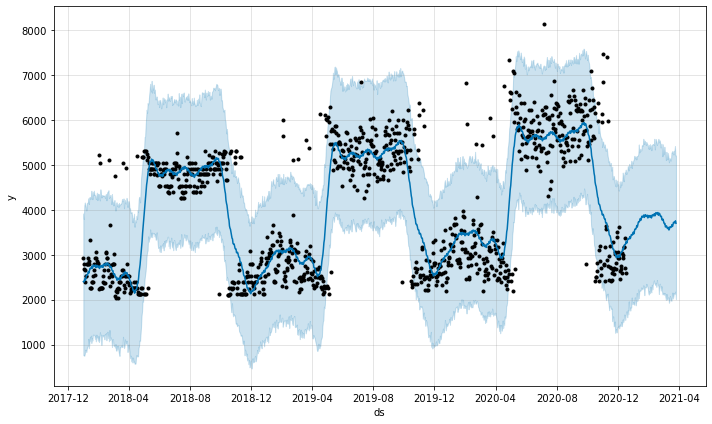

In [43]:
plot1= m.plot(forecast)

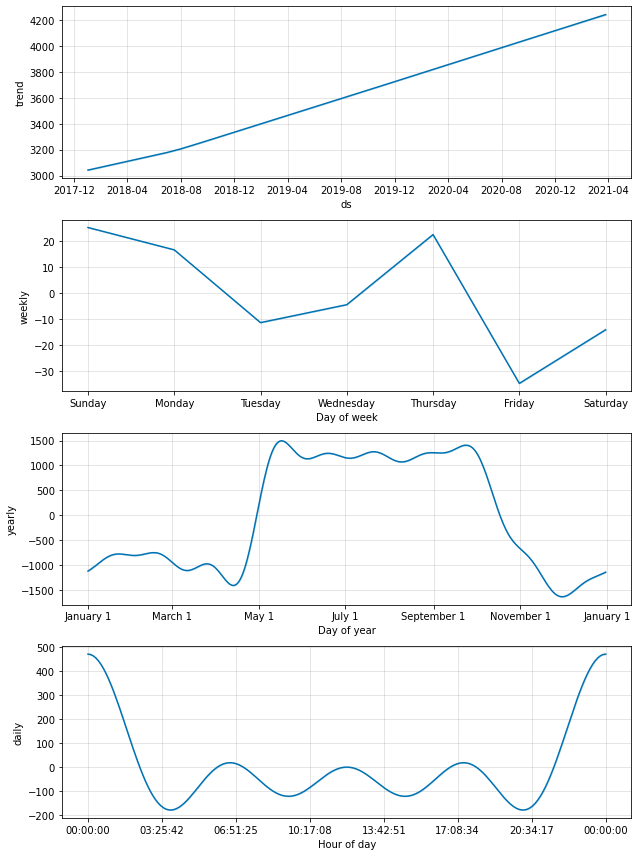

In [44]:
plot2= m.plot_components(forecast)